In [ ]:
#Extra Credit Assignment

In [ ]:
#Student Name: Huy Huynh

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx               
from nxviz import CircosPlot

In [392]:
from IPython.core.display import display, HTML
# Modify the height of your scolling output window in Jupyter notebook
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [393]:
# read from excel
xlsx = pd.ExcelFile('CS2311 S20GraphEntry.xlsx')

In [394]:
type(xlsx) 

pandas.io.excel._base.ExcelFile

In [395]:
edge_df = pd.read_excel(xlsx, sheet_name = "Edge_List")

In [396]:
edge_df.head()

,N_1_Index,N_2_Index,Frequency_(1-5)
0,1,23,1.6
1,1,20,1.2
2,1,18,0.8
3,1,4,0.4
4,1,3,0.4


In [397]:
edge_df.dtypes

N_1_Index            int64
N_2_Index            int64
Frequency_(1-5)    float64
dtype: object

In [398]:
edge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
N_1_Index          91 non-null int64
N_2_Index          91 non-null int64
Frequency_(1-5)    91 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.3 KB


In [399]:
edge_df.isna().sum()

N_1_Index          0
N_2_Index          0
Frequency_(1-5)    0
dtype: int64

In [400]:
edge_df.describe()

,N_1_Index,N_2_Index,Frequency_(1-5)
count,91.000000,91.000000,91.000000
mean,13.494505,28.560440,1.331868
std,8.212962,15.954246,0.587439
min,1.000000,1.000000,0.400000
25%,6.000000,14.000000,0.800000
50%,13.000000,32.000000,1.200000
75%,22.000000,39.500000,2.000000
max,26.000000,56.000000,2.000000


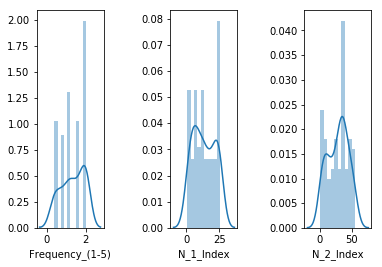

In [401]:
# Visualize the distribution of the columns - set up a subplot grid 1x3 for this
fig,ax = plt.subplots(1,3)
plt.subplots_adjust(wspace=1, hspace=1)
sns.distplot(edge_df["Frequency_(1-5)"],ax=ax[0],bins=10)
sns.distplot(edge_df["N_1_Index"],ax=ax[1],bins=10)
sns.distplot(edge_df["N_2_Index"],ax=ax[2],bins=10)

In [402]:
# Find number of unique values in N_1_Index and N_2_Index. Using display() here to do the pretty print of the output.
# Methods to use:  .unique(), .sort_values()
display(edge_df.N_1_Index.unique())
display(edge_df.N_2_Index.sort_values().unique())

array([ 1, 10,  3,  6, 22, 13, 15, 17, 26,  7, 11, 24, 20,  4,  9, 25])

array([ 1,  3,  4,  6,  9, 10, 11, 13, 15, 17, 18, 19, 20, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

In [403]:
e1 = edge_df.N_1_Index

In [404]:
e2 = edge_df.N_2_Index

In [405]:
def f(e1,e2):
    pairs = []
    for i in range(len(e1)):
        #print(str(e1),str(e2))
        if e1[i] < e2[i]:
            s = (format(e1[i],".2f") + format(e2[i],".2f"))
        else:
            s = (format(e2[i],".2f") + format(e1[i],".2f"))
        pairs.append(s)
    return pairs

In [406]:
l = f(e1,e2)

In [407]:
edge_df["pairs"]=pd.Series(l)
edge_df.head()

,N_1_Index,N_2_Index,Frequency_(1-5),pairs
0,1,23,1.6,1.0023.00
1,1,20,1.2,1.0020.00
2,1,18,0.8,1.0018.00
3,1,4,0.4,1.004.00
4,1,3,0.4,1.003.00


In [408]:
# identify the duplicates using .duplicated - show all duplicates - notice that there are indeed a few duplicates.
# show the values for the dataframe
dups = edge_df.pairs.duplicated(keep=False)
dups.values

array([False, False, False,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False])

In [409]:
fmap = edge_df[dups.values].groupby("pairs")["Frequency_(1-5)"].apply(np.mean).to_dict()
fmap

{'1.004.00': 0.4,
 '11.0017.00': 2.0,
 '15.0020.00': 1.6,
 '22.0026.00': 1.0,
 '3.0013.00': 1.6,
 '3.004.00': 2.0,
 '3.009.00': 0.6000000000000001,
 '4.0013.00': 2.0,
 '6.0024.00': 1.2,
 '9.0011.00': 2.0,
 '9.0017.00': 2.0}

In [410]:
# create a new column "temp" that will map the value in "pairs" to value in fmap. All other values in temp where therabse
# is no map will be set to NaN
edge_df["temp"]=edge_df["pairs"].map(fmap)

In [411]:
# fill then NaN values with the values in the "Frequency_(1-5) column". Use inplace=True to permanently change values
edge_df.temp.fillna(edge_df["Frequency_(1-5)"],inplace=True)

In [412]:
# inspect - notice that Frequenc_(1-5) and temp now match except for duplicates in temp that have the average value
edge_df.head()

,N_1_Index,N_2_Index,Frequency_(1-5),pairs,temp
0,1,23,1.6,1.0023.00,1.6
1,1,20,1.2,1.0020.00,1.2
2,1,18,0.8,1.0018.00,0.8
3,1,4,0.4,1.004.00,0.4
4,1,3,0.4,1.003.00,0.4


In [413]:
# Now assign the "temp" colum to "Frequency_(1-5)", drop the duplicates in the "pairs" column, keeping the first and
# use inplace=True to permanetly modify
edge_df["temp"]=edge_df["Frequency_(1-5)"]

In [414]:
edge_df.drop_duplicates("pairs",keep="first",inplace=True)

In [415]:
# Drop the "pairs", and "temp" columns since they are not needed any more
edge_df.drop(["pairs","temp"],axis="columns",inplace=True)

In [416]:
# inspect
edge_df

,N_1_Index,N_2_Index,Frequency_(1-5)
0,1,23,1.6
1,1,20,1.2
2,1,18,0.8
3,1,4,0.4
4,1,3,0.4
...,...,...,...
86,25,37,1.2
87,25,9,0.4
88,25,46,0.8
89,25,38,0.4


In [417]:
# ----------------fill in missing code.  Use tuple() and iloc
edge_list = []
for i in range(len(edge_df)):
    edge_list.append(tuple(edge_df.iloc[i]))

In [418]:
# Inspect output for first 5 entries in edge list dataframe
edge_list[0:5]   

[(1.0, 23.0, 1.6),
 (1.0, 20.0, 1.2),
 (1.0, 18.0, 0.8),
 (1.0, 4.0, 0.4),
 (1.0, 3.0, 0.4)]

In [419]:
len(edge_list)

80

In [420]:
# read node information from the "Node_list" sheet
node_df = pd.read_excel(xlsx,sheet_name="Node_List")

In [421]:
# inspect
display(node_df.head())
display(node_df.tail())

,Name,Node_ID,Degree,Year,Role,Schol_Acad
0,Arzadon.M,1,DS,FR,Student,1
1,Copsey.L,3,DS,JR,Student,0
2,Cox.K,4,DS,JR,Student,0
3,Gee.J,6,DS,SR,Student,0
4,Hoang.M,7,DS,SO,Student,0


,Name,Node_ID,Degree,Year,Role,Schol_Acad
45,Le. P,56,DS,SO,Student,0
46,Nguyen.D,57,CS,JR,Student,0
47,Moore.S,58,CS,SO,Student,0
48,Pham. T,59,MATH,JR,Student,0
49,hernandez.C,60,MATH,SO,Student,0


In [422]:
# show types - notice Node_ID and Schol_Acad are float need to be converted to int
node_df.dtypes

Name          object
Node_ID        int64
Degree        object
Year          object
Role          object
Schol_Acad     int64
dtype: object

In [423]:
# examine info - looks like we have a lot of NaN info length one hundred and only 49 rows filled. Probably blank
# entries from excel
node_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
Name          50 non-null object
Node_ID       50 non-null int64
Degree        50 non-null object
Year          50 non-null object
Role          50 non-null object
Schol_Acad    50 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [424]:
# get sum of Nan's
node_df.isna().sum()

Name          0
Node_ID       0
Degree        0
Year          0
Role          0
Schol_Acad    0
dtype: int64

In [425]:
# quick summary look at your data - not very useful in this case (use include="all") to summariz numeric and categorical
node_df.describe(include="all")

,Name,Node_ID,Degree,Year,Role,Schol_Acad
count,50,50.000000,50,50,50,50.000000
unique,50,NaN,6,7,2,NaN
top,Kimble. K,NaN,DS,SR,Student,NaN
freq,1,NaN,22,19,41,NaN
mean,NaN,34.000000,NaN,NaN,NaN,0.320000
std,NaN,16.836549,NaN,NaN,NaN,0.471212
min,NaN,1.000000,NaN,NaN,NaN,0.000000
25%,NaN,22.500000,NaN,NaN,NaN,0.000000
50%,NaN,35.500000,NaN,NaN,NaN,0.000000
75%,NaN,47.750000,NaN,NaN,NaN,1.000000


In [426]:
# Drop all rows that have any NaN i.e. the 51 blank rows use how="any"
node_df = node_df.dropna(how='any')

In [427]:
# inspect
display(node_df.head())
display(node_df.tail())

,Name,Node_ID,Degree,Year,Role,Schol_Acad
0,Arzadon.M,1,DS,FR,Student,1
1,Copsey.L,3,DS,JR,Student,0
2,Cox.K,4,DS,JR,Student,0
3,Gee.J,6,DS,SR,Student,0
4,Hoang.M,7,DS,SO,Student,0


,Name,Node_ID,Degree,Year,Role,Schol_Acad
45,Le. P,56,DS,SO,Student,0
46,Nguyen.D,57,CS,JR,Student,0
47,Moore.S,58,CS,SO,Student,0
48,Pham. T,59,MATH,JR,Student,0
49,hernandez.C,60,MATH,SO,Student,0


In [428]:
# Rename the columns to ["Name","node","Degree","Year","Role","SA"]
node_df.columns= ["Name","node","Degree","Year","Role","SA"]

In [429]:
# inspect
node_df.head()

,Name,node,Degree,Year,Role,SA
0,Arzadon.M,1,DS,FR,Student,1
1,Copsey.L,3,DS,JR,Student,0
2,Cox.K,4,DS,JR,Student,0
3,Gee.J,6,DS,SR,Student,0
4,Hoang.M,7,DS,SO,Student,0


In [430]:
# "node" and "SA" column are float need to be integer. use .applymap(np.int64) on the "node" and "SA" columns
# (Use .map for series, .applymap for dataframes)
node_df[["node","SA"]] = node_df[["node","SA"]].applymap(np.int64)

In [431]:
# now set the node integer column to the dataframe index.  Use the .set_index() method, drop the current index and 
# set inplace = True to make permanent
node_df.set_index("node",drop=True,inplace=True)

In [432]:
# inspect
node_df.head()

,Name,Degree,Year,Role,SA
node,,,,,
1,Arzadon.M,DS,FR,Student,1
3,Copsey.L,DS,JR,Student,0
4,Cox.K,DS,JR,Student,0
6,Gee.J,DS,SR,Student,0
7,Hoang.M,DS,SO,Student,0


In [433]:
# Inspect data types
node_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 60
Data columns (total 5 columns):
Name      50 non-null object
Degree    50 non-null object
Year      50 non-null object
Role      50 non-null object
SA        50 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


In [434]:
# inspect first node - use .iloc
node_df.iloc[0]

Name      Arzadon.M
Degree           DS
Year             FR
Role        Student
SA                1
Name: 1, dtype: object

In [435]:
# see if we can convert from df to dictionary - yes
node_df.iloc[0,:].to_dict()

{'Name': 'Arzadon.M', 'Degree': 'DS', 'Year': 'FR', 'Role': 'Student', 'SA': 1}

In [436]:
# set up the node list for graph. Use tuple() and .to_dict()
node_list = []
for i in range(len(node_df)):
    node_list.append(tuple([i+1,node_df.iloc[i,:].to_dict()]))

In [437]:
# inspect first 3 elements of node list
node_list[0:3]

[(1,
  {'Name': 'Arzadon.M',
   'Degree': 'DS',
   'Year': 'FR',
   'Role': 'Student',
   'SA': 1}),
 (2,
  {'Name': 'Copsey.L',
   'Degree': 'DS',
   'Year': 'JR',
   'Role': 'Student',
   'SA': 0}),
 (3,
  {'Name': 'Cox.K', 'Degree': 'DS', 'Year': 'JR', 'Role': 'Student', 'SA': 0})]

In [438]:
# Set up empty graph
G = nx.Graph()                        # empty graph

In [439]:
# what data type are we working with?
type(G)

networkx.classes.graph.Graph

In [440]:
# set up the nodes use .add_node_from() method for G
G.add_nodes_from(node_list)

In [441]:
# set up the edges use .add_weighted_edges_from() method for G
G.add_weighted_edges_from(edge_list)

In [442]:
# let's start to examine the graph - how many nodes?
len(G)

56

In [443]:
# The .info() method summarizes the graph for us
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 56
Number of edges: 80
Average degree:   2.8571


In [444]:
# we can also summarize information on a particular node 
print(nx.info(G,16))

Node 16 has the following properties:
Degree: 0
Neighbors: 


In [445]:
# get a list of all the nodes
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53.0, 51.0, 52.0, 55.0, 56.0, 54.0))

In [446]:
# now get the list with all the associated information. Note that the node "metadata" is kept in a dictionary for that
# node. We can add to the dictionary for each or all nodes.
display(G.nodes(data=True)[1])    # inspect 1st node
display(G.nodes(data=True)[5])    # inspect 5th
display(G.nodes(data=True)[16])   # inspect 16th

{'Name': 'Arzadon.M', 'Degree': 'DS', 'Year': 'FR', 'Role': 'Student', 'SA': 1}

{'Name': 'Hoang.M', 'Degree': 'DS', 'Year': 'SO', 'Role': 'Student', 'SA': 0}

{'Name': 'Zhamangaraeva.A',
 'Degree': 'CS',
 'Year': 'SR',
 'Role': 'Student',
 'SA': 1}

In [447]:
# Now lets look at the edges information.  Data here is also list of tuples with start node, end node, and meta-data
# dictionary.  Need to use data = True to get the metadata dictionary for the edge pairs.
display(list(G.edges(data=True))[1])    #  <--- inspect 1st edge
display(list(G.edges(data=True))[2])    #  <--- inspect 2nd edge
display(list(G.edges(data=True))[3])    #  <--- inspect 3rd edge

(1, 20.0, {'weight': 1.2})

(1, 18.0, {'weight': 0.8})

(1, 4.0, {'weight': 0.4})

In [448]:
# number of edges
G.number_of_edges()

80

In [449]:
# Now let's put the edge information in a data frame to make it easier to see what's going on. Relabel columns to those 
# shown
edges_df = pd.DataFrame(G.edges(data=True),columns=["n1","n2","weight"])

In [450]:
edges_df.head()

,n1,n2,weight
0,1,23.0,{'weight': 1.6}
1,1,20.0,{'weight': 1.2}
2,1,18.0,{'weight': 0.8}
3,1,4.0,{'weight': 0.4}
4,1,3.0,{'weight': 0.4}


In [451]:
# Set up a lambda function and do a mapping to just the value associated with weight key in dictionary. Use .map(f)
f = lambda d: d["weight"]
edges_df["weight"] = edges_df["weight"].map(f)

In [452]:
#inspect
edges_df.tail()

,n1,n2,weight
75,26,49.0,1.6
76,26,50.0,1.6
77,26,35.0,0.8
78,26,51.0,1.2
79,26,52.0,0.4


In [453]:
# Get the degree of each node. Use .degree()
G.degree()

DegreeView({1: 7, 2: 0, 3: 7, 4: 7, 5: 0, 6: 7, 7: 6, 8: 0, 9: 8, 10: 3, 11: 6, 12: 0, 13: 6, 14: 0, 15: 6, 16: 0, 17: 6, 18: 2, 19: 1, 20: 7, 21: 0, 22: 6, 23: 1, 24: 7, 25: 7, 26: 6, 27: 1, 28: 3, 29: 1, 30: 2, 31: 1, 32: 1, 33: 1, 34: 5, 35: 5, 36: 5, 37: 3, 38: 2, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 2, 45: 1, 46: 3, 47: 2, 48: 1, 49: 1, 50: 1, 53.0: 1, 51.0: 1, 52.0: 1, 55.0: 3, 56.0: 1, 54.0: 1})

In [454]:
#set up a dataframe with degree for each node in graph, set index to node so we can concatenate with node_df later
degree_df = pd.DataFrame(G.degree,columns=["node","degree"])
degree_df.set_index("node",drop=True,inplace=True)

In [455]:
# inspect 
degree_df.head()

,degree
node,
1.0,7
2.0,0
3.0,7
4.0,7
5.0,0


In [456]:
# get weighted degree
G.degree(weight='weight')

DegreeView({1: 5.6, 2: 0, 3: 6.8, 4: 8.8, 5: 0, 6: 10.399999999999999, 7: 7.6000000000000005, 8: 0, 9: 11.6, 10: 4.8, 11: 8.8, 12: 0, 13: 8.0, 14: 0, 15: 9.6, 16: 0, 17: 8.0, 18: 2.4000000000000004, 19: 0.4, 20: 10.4, 21: 0, 22: 8.799999999999999, 23: 1.6, 24: 9.2, 25: 6.000000000000001, 26: 6.800000000000001, 27: 2.0, 28: 4.8, 29: 0.8, 30: 3.2, 31: 2.0, 32: 2.0, 33: 1.6, 34: 7.199999999999999, 35: 7.6000000000000005, 36: 5.2, 37: 2.8, 38: 1.6, 39: 2.0, 40: 1.6, 41: 1.2, 42: 2.0, 43: 1.2, 44: 2.4, 45: 0.4, 46: 3.5999999999999996, 47: 2.4, 48: 2.0, 49: 1.6, 50: 1.6, 53.0: 1.2, 51.0: 1.2, 52.0: 0.4, 55.0: 4.0, 56.0: 2.0, 54.0: 1.6})

In [457]:
#set up a dataframe with degree for each node in graph set node as index 
degree_wtd_df = pd.DataFrame(G.degree(weight='weight'),columns=["node","degree_wtd"])
degree_wtd_df.set_index("node",drop=True,inplace=True)

In [458]:
# inspect
degree_wtd_df.head()

,degree_wtd
node,
1.0,5.6
2.0,0.0
3.0,6.8
4.0,8.8
5.0,0.0


In [459]:
# betweeness centrality - bc is a dictionary of node and metric - can use bc.items() to get node and metric values
bc = nx.betweenness_centrality(G)

In [460]:
#set up a dataframe with degree for each node in graph set node as index
between_df = pd.DataFrame(bc.items(),columns=["node","between_cent"])
between_df.set_index("node",drop=True,inplace=True)

In [461]:
# inspect
between_df.head()

,between_cent
node,
1.0,0.156207
2.0,0.000000
3.0,0.106886
4.0,0.053383
5.0,0.000000


In [462]:
# closeness centrality
cc = nx.closeness_centrality(G)

In [463]:
#set up a dataframe with degree for each node in graph set node as index
close_df = pd.DataFrame(cc.items(),columns=["node","close_cent"])
close_df.set_index("node",drop=True,inplace=True)

In [464]:
close_df.head()

,close_cent
node,
1.0,0.355008
2.0,0.000000
3.0,0.337830
4.0,0.343368
5.0,0.000000


In [465]:
# degree centrality
dc = nx.degree_centrality(G)

In [466]:
#set up a dataframe with degree for each node in graph set node as index
dc_df = pd.DataFrame(dc.items(),columns=["node","deg_cent"])
dc_df.set_index("node",drop=True,inplace=True)

In [467]:
dc_df.head()

,deg_cent
node,
1.0,0.127273
2.0,0.000000
3.0,0.127273
4.0,0.127273
5.0,0.000000


In [468]:
# clustering coefficient
c = nx.clustering(G)

In [469]:
#set up a dataframe, see node as index
c_df = pd.DataFrame(c.items(),columns=["node","clustering"])
c_df.set_index("node",drop=True,inplace=True)

In [470]:
# inspect
c_df.head()

,clustering
node,
1.0,0.047619
2.0,0.000000
3.0,0.095238
4.0,0.333333
5.0,0.000000


In [471]:
df2 = pd.concat([node_df,degree_df, degree_wtd_df,dc_df,between_df,close_df,c_df], axis= 1, sort=False)

In [472]:
# inspect
df2.head()

,Name,Degree,Year,Role,SA,degree,degree_wtd,deg_cent,between_cent,close_cent,clustering
node,,,,,,,,,,,
1.0,Arzadon.M,DS,FR,Student,1.0,7.0,5.6,0.127273,0.156207,0.355008,0.047619
2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3.0,Copsey.L,DS,JR,Student,0.0,7.0,6.8,0.127273,0.106886,0.337830,0.095238
4.0,Cox.K,DS,JR,Student,0.0,7.0,8.8,0.127273,0.053383,0.343368,0.333333
5.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [473]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import warnings                   #<--- use this to suppress deprecation warnings from matplotlib
warnings.filterwarnings("ignore")

# set up a function to plot the distribution of centrality metric in the graph. 
# Three types of graphs 1 = hist, 2 - seaborn distplot, 3 - seaborn hist and distplot
def plot_degree_dist(metric,metric_name,type=1):
    plt.figure(figsize=(15,6))
    if type==1:
        plt.hist(metric,bins=20)      # histogram
    elif type==2:
        sns.distplot(metric,bins=20)   # seaborn distribution plot
    else:
        sns.distplot(metric, rug=True, rug_kws={"color": "g"},  # more customized distribution plot plus histogram
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
    plt.title(metric_name+ " Distribution of Student Network")
    plt.show()

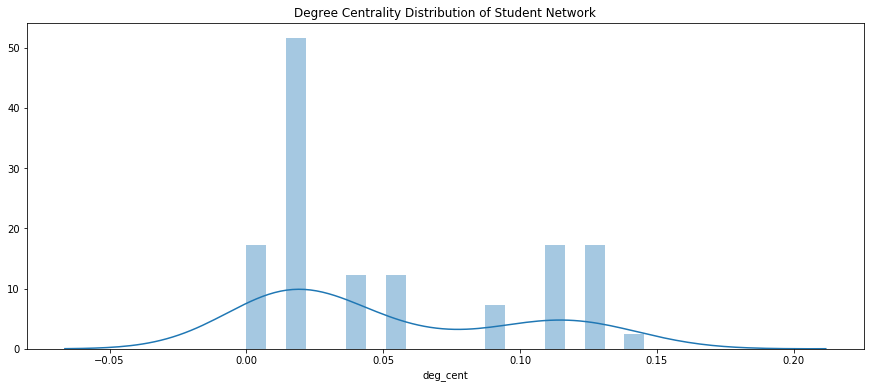

In [474]:
plot_degree_dist(df2.deg_cent,"Degree Centrality",type=2)

In [475]:
# what is the shortest path between node 10 and node 113?
source = 10
target = 13
shortest_path = nx.shortest_path(G,source=source,target=target)
print(shortest_path)
for student in shortest_path:
    print(" Next: ",student," ",G.nodes(data=True)[student])

[10, 24.0, 4.0, 13]
 Next:  10   {'Name': 'Nguyen.A', 'Degree': 'DS', 'Year': 'SR', 'Role': 'Student', 'SA': 1}
 Next:  24.0   {'Name': 'Zafiris.V', 'Degree': 'MATH', 'Year': 'PHD', 'Role': 'Professor', 'SA': 0}
 Next:  4.0   {'Name': 'Gee.J', 'Degree': 'DS', 'Year': 'SR', 'Role': 'Student', 'SA': 0}
 Next:  13   {'Name': 'Ruiz.E', 'Degree': 'CS', 'Year': 'SR', 'Role': 'Student', 'SA': 1}


In [476]:
#What is the shortest path between me and the highest centrality node? (assuming you aren’t the highest centrality node otherwise, pick the next most central node)

In [477]:
source = 9
target = 35
shortest_path = nx.shortest_path(G,source=source,target=target)
print(shortest_path)
for student in shortest_path:
    print(" Next: ",student," ",G.nodes(data=True)[student])

[9, 35.0]
 Next:  9   {'Name': 'Ly.H', 'Degree': 'CS', 'Year': 'SR', 'Role': 'Student', 'SA': 0}
 Next:  35.0   {'Name': 'Phan.S', 'Degree': 'CS', 'Year': 'SR', 'Role': 'Student', 'SA': 1}


In [478]:
#Who are the neighbors of the highest degree centrality node?

In [479]:
# get the index of node with the highest degree
max_degree = df2.degree.idxmax()
max_between = df2.between_cent.idxmax()

In [480]:
df2.loc[max_degree,"Name"]

'Huynh.H'

In [481]:
# use .loc, .neighbors()
print("Node id with highest degree is: ",max_degree,"/",df2.loc[max_degree,"Name"],
      ", with degree = ",df2.loc[max_degree,"degree"])
print("Neighbors are:")
list(G.neighbors(max_degree))

Node id with highest degree is:  9.0 / Huynh.H , with degree =  8.0
Neighbors are:


[3.0, 17.0, 7.0, 11.0, 35.0, 44.0, 36.0, 25.0]

In [482]:
print("Node id with highest betweenness centrality is: ",max_between,"/",df2.loc[max_between,"Name"],
      ", with betweenness = ",df2.loc[max_between,"between_cent"])
print("Neighbors are:")
list(G.neighbors(max_between))

Node id with highest betweenness centrality is:  35.0 / Henderson.J , with betweenness =  0.1928020950243173
Neighbors are:


[13.0, 26.0, 20.0, 4.0, 9.0]

In [483]:
#What is the subgraph and plot of your node and the nodes of the two highest degree centrality node – This could form a basis for a recommendation engine for students to get to know (they seem to be connected and central for some reason)

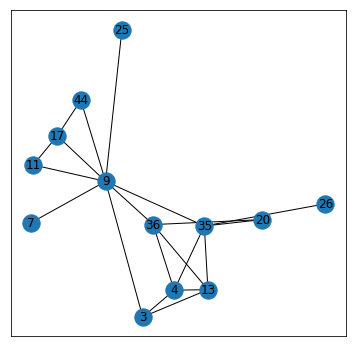

In [484]:
# the subgraph of me and the two highest degree centrality node.
res = [9,3,17,7,11,35,44,36,25,13,26,20,4,9]
k = G.subgraph(res)  
pos = nx.spring_layout(k)  #setting the positions with respect to G, not k.
plt.figure(figsize=(6,6))
nx.draw_networkx(k, pos=pos)
plt.show()

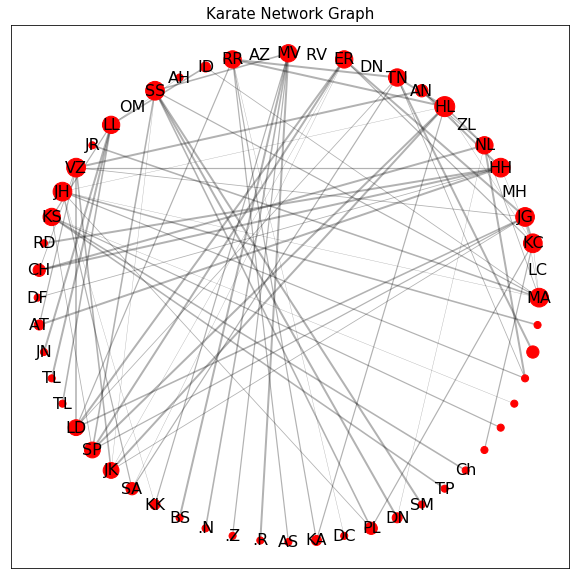

In [493]:
pos = nx.circular_layout(G)  #setting the positions with respect to G, not k.
plt.figure(figsize=(10,10))

nx.draw_networkx_labels(G, pos, labels, font_size=16)

nx.draw_networkx_nodes(G, pos=pos,node_color=color_map,node_size = 50*df2.degree,node_labels=True,
                  edges=edges, width=weights)
nx.draw_networkx_edges(G, pos=pos,node_color=color_map,node_size = 50*df2.degree,node_labels=True,
                  edges=edges, width=weights,alpha=0.3)
plt.title("Karate Network Graph",fontsize= 15)
plt.show()